In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

d1 =pd.read_csv("gt_2011.csv") #Load all .csv files
d2 =pd.read_csv("gt_2012.csv")
d3 =pd.read_csv("gt_2013.csv")
d4 =pd.read_csv("gt_2014.csv")
d5 =pd.read_csv("gt_2015.csv")

# Data Description

In [2]:
d1.info() #2011 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7411 non-null   float64
 1   AP      7411 non-null   float64
 2   AH      7411 non-null   float64
 3   AFDP    7411 non-null   float64
 4   GTEP    7411 non-null   float64
 5   TIT     7411 non-null   float64
 6   TAT     7411 non-null   float64
 7   TEY     7411 non-null   float64
 8   CDP     7411 non-null   float64
 9   CO      7411 non-null   float64
 10  NOX     7411 non-null   float64
dtypes: float64(11)
memory usage: 637.0 KB


In [3]:
d2.info() #2012 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7628 non-null   float64
 1   AP      7628 non-null   float64
 2   AH      7628 non-null   float64
 3   AFDP    7628 non-null   float64
 4   GTEP    7628 non-null   float64
 5   TIT     7628 non-null   float64
 6   TAT     7628 non-null   float64
 7   TEY     7628 non-null   float64
 8   CDP     7628 non-null   float64
 9   CO      7628 non-null   float64
 10  NOX     7628 non-null   float64
dtypes: float64(11)
memory usage: 655.7 KB


In [4]:
d3.info() #2013 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7152 non-null   float64
 1   AP      7152 non-null   float64
 2   AH      7152 non-null   float64
 3   AFDP    7152 non-null   float64
 4   GTEP    7152 non-null   float64
 5   TIT     7152 non-null   float64
 6   TAT     7152 non-null   float64
 7   TEY     7152 non-null   float64
 8   CDP     7152 non-null   float64
 9   CO      7152 non-null   float64
 10  NOX     7152 non-null   float64
dtypes: float64(11)
memory usage: 614.8 KB


In [5]:
d4.info() #2014 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7158 non-null   float64
 1   AP      7158 non-null   float64
 2   AH      7158 non-null   float64
 3   AFDP    7158 non-null   float64
 4   GTEP    7158 non-null   float64
 5   TIT     7158 non-null   float64
 6   TAT     7158 non-null   float64
 7   TEY     7158 non-null   float64
 8   CDP     7158 non-null   float64
 9   CO      7158 non-null   float64
 10  NOX     7158 non-null   float64
dtypes: float64(11)
memory usage: 615.3 KB


In [6]:
d5.info() #2015 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [7]:
d1.describe() #2011 Statistic Summary

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,17.112261,1014.167883,79.174989,4.090755,25.663721,1084.733909,544.503170,135.745675,12.207578,1.572486,67.575392
std,7.428307,6.293003,13.465898,0.661865,4.325835,16.134972,8.288471,16.209187,1.146561,1.845442,10.683331
min,2.116300,995.790000,34.493000,2.758400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,10.992000,1009.800000,70.428500,3.644750,23.364500,1082.500000,538.560000,130.745000,11.684000,0.726405,60.361500
50%,16.366000,1013.600000,82.129000,4.026300,24.770000,1088.000000,549.860000,133.810000,12.008000,1.155700,65.542000
75%,23.344500,1018.100000,89.778000,4.480350,29.879500,1099.800000,550.040000,148.325000,13.257000,1.754600,74.314500
max,34.532000,1034.200000,100.170000,7.318900,36.003000,1100.600000,550.610000,170.000000,14.851000,43.622000,119.320000


In [8]:
d2.describe() #2012 Statistic Summary

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000
mean,18.397950,1012.258153,79.074804,4.306717,25.181361,1082.890233,546.263793,132.675552,12.000121,2.361133,68.788965
std,7.661038,6.384291,14.105087,0.831170,4.006825,16.852148,7.331345,15.302140,1.049384,2.474116,10.224937
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.007505,41.777000
25%,12.269250,1008.400000,69.165250,3.882650,23.090750,1075.800000,547.657500,125.240000,11.469750,1.127125,62.531250
50%,19.120500,1012.000000,82.411500,4.298050,25.221000,1089.100000,549.920000,133.760000,12.041000,1.636300,67.246500
75%,24.337250,1016.000000,90.356250,4.670525,26.322250,1093.800000,550.070000,134.900000,12.290000,2.953025,73.424500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


In [9]:
d3.describe() #2013 Statistic Summary

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7152.00000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000
mean,17.60262,1011.999607,80.461624,3.695958,25.105097,1081.569463,545.780885,132.168342,11.971586,2.723031,70.007899
std,6.86289,6.290065,14.125390,0.805829,4.350711,17.385147,7.358935,16.348156,1.132159,2.363913,12.048249
min,0.28985,989.380000,27.504000,2.329500,18.104000,1022.100000,518.320000,101.480000,9.875400,0.005033,43.198000
25%,12.04875,1008.400000,71.493500,3.100350,21.385000,1065.975000,543.745000,118.005000,11.001250,1.257975,62.269000
50%,17.20450,1011.800000,84.002000,3.627850,24.852500,1087.300000,549.900000,133.570000,11.956000,1.782700,68.651000
75%,23.16400,1016.000000,91.579000,4.156825,26.385750,1094.400000,550.030000,135.520000,12.319250,3.591225,76.001500
max,33.87300,1029.700000,100.190000,6.977900,36.950000,1100.500000,550.530000,172.960000,14.867000,35.045000,119.910000


In [10]:
d4.describe() #2014 Statistic Summary

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000,7158.000000
mean,18.217071,1012.384261,82.143926,3.914499,25.741993,1078.836854,547.638254,132.907978,12.023857,2.081103,60.066886
std,6.994920,5.973395,13.000424,0.710941,3.684873,16.574391,4.611472,13.602856,0.948352,2.006939,9.971729
min,1.144400,994.840000,25.987000,2.151700,17.939000,1002.900000,511.040000,100.030000,9.851800,0.001640,27.183000
25%,12.925500,1008.100000,73.441250,3.552750,23.698250,1069.625000,546.972500,123.380000,11.447000,1.251125,53.876750
50%,18.284000,1012.000000,84.656500,3.859650,25.194000,1079.200000,549.910000,133.420000,11.909000,1.655300,59.278500
75%,23.684000,1016.300000,92.826000,4.314350,27.994000,1092.500000,550.050000,141.635000,12.641250,2.160225,64.031000
max,34.189000,1031.400000,100.100000,6.738600,36.216000,1100.900000,550.600000,168.630000,14.617000,34.820000,118.470000


In [11]:
d5.describe() #2015 Statistic Summary

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [12]:
dtotal = pd.concat([d1,d2,d3,d4,d5])
dtotal.dropna() #Data cleaned

dtotal.info() #Combine all year 2011-2015 datasets into 1 dataset
             #It looks like there are no missing data points from year 2011-2015.
            #All data types are float64.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [13]:
dtotal.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [14]:
dtotal.describe() #Statistic Summary of year 2011-2015 which include count,mean,standard deviation, min, max, 
                    #1st quartile, median, and 3rd quartile
                    #There are 36733 instances for each attributes in the dataset


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


# Data Visualization

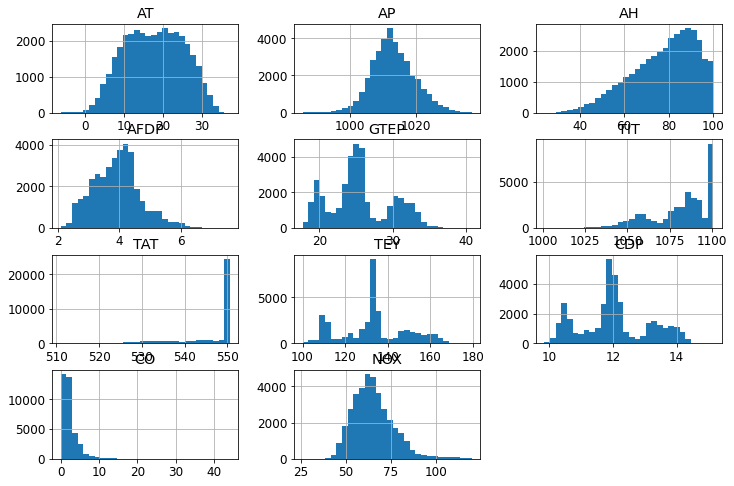

In [15]:
import matplotlib.pyplot as plt
dtotal.hist(bins=30, figsize=(12,8))  #Histogram of all 11 attributes from year 2011-2015
plt.show()

array([[<AxesSubplot:xlabel='AT', ylabel='AT'>,
        <AxesSubplot:xlabel='AP', ylabel='AT'>,
        <AxesSubplot:xlabel='AH', ylabel='AT'>,
        <AxesSubplot:xlabel='AFDP', ylabel='AT'>,
        <AxesSubplot:xlabel='GTEP', ylabel='AT'>,
        <AxesSubplot:xlabel='TIT', ylabel='AT'>,
        <AxesSubplot:xlabel='TAT', ylabel='AT'>,
        <AxesSubplot:xlabel='TEY', ylabel='AT'>,
        <AxesSubplot:xlabel='CDP', ylabel='AT'>,
        <AxesSubplot:xlabel='CO', ylabel='AT'>,
        <AxesSubplot:xlabel='NOX', ylabel='AT'>],
       [<AxesSubplot:xlabel='AT', ylabel='AP'>,
        <AxesSubplot:xlabel='AP', ylabel='AP'>,
        <AxesSubplot:xlabel='AH', ylabel='AP'>,
        <AxesSubplot:xlabel='AFDP', ylabel='AP'>,
        <AxesSubplot:xlabel='GTEP', ylabel='AP'>,
        <AxesSubplot:xlabel='TIT', ylabel='AP'>,
        <AxesSubplot:xlabel='TAT', ylabel='AP'>,
        <AxesSubplot:xlabel='TEY', ylabel='AP'>,
        <AxesSubplot:xlabel='CDP', ylabel='AP'>,
        <AxesSubplot:x

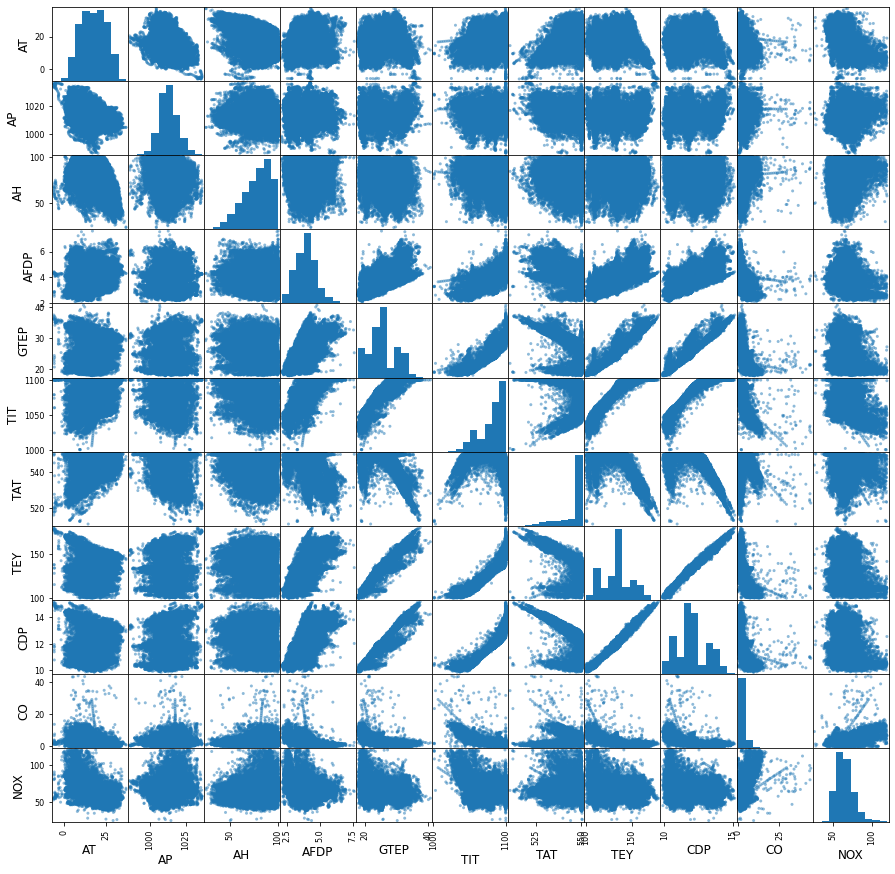

In [16]:
pd.plotting.scatter_matrix(dtotal,figsize  = [15, 15]) #Scatter plot of all 11 attributes from year 2011-2015

In [17]:
corr_matrix = dtotal.corr()
corr_matrix #correlation of all attributes from year 2011-2015

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586,0.164617
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256
CO,-0.174326,0.067050,0.106586,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000,0.340606


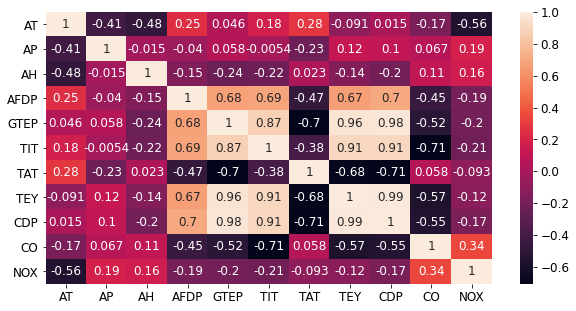

In [18]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dtotal.corr(), annot=True) #heatmap of correlation of all 11 attributes from year 2011-2015
plt.show() 


In [19]:
d1.dropna(inplace=True)
d2.dropna(inplace=True)
d3.dropna(inplace=True)
d4.dropna(inplace=True)
d5.dropna(inplace=True)
train= pd.concat([d1,d2,d3])             #Input Train set : 9 input attributes for first 3 years (2011-2013)
test = pd.concat([d4,d5])                #Output Train set : Output attribute ['TEY'] for first 3 years (2011-2013)
ytrain = pd.concat([train['CO'],train['NOX']],axis=1)                                        #Input Test set : 9 input attributes for last 2 years (2014-2015)
                                          #Output Test set : Output attribute ['TEY'] for last 2 years (2014-2015)
xtrain = train.drop(['CO','NOX'],inplace=False,axis=1)

xtest = test.drop(['CO','NOX'],inplace=False,axis=1)

ytrainCO= pd.concat([d1['CO'],d2['CO'],d3['CO']])
ytrainNOX= pd.concat([d1['NOX'],d2['NOX'],d3['NOX']])
ytestCO = pd.concat([d4['CO'],d5['CO']])
ytestNOX= pd.concat([d4['NOX'],d5['NOX']])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22191 entries, 0 to 7151
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      22191 non-null  float64
 1   AP      22191 non-null  float64
 2   AH      22191 non-null  float64
 3   AFDP    22191 non-null  float64
 4   GTEP    22191 non-null  float64
 5   TIT     22191 non-null  float64
 6   TAT     22191 non-null  float64
 7   TEY     22191 non-null  float64
 8   CDP     22191 non-null  float64
 9   CO      22191 non-null  float64
 10  NOX     22191 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14542 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14542 non-null  float64
 1   AP      14542 non-null  float64
 2   AH      14542 non-null  float64
 3   AFDP    14542 non-null  float64
 4   GTEP    14542 non-null  float64
 5   TIT     14542 non-null  float64
 6   TAT     14542 non-null  float64
 7   TEY     14542 non-null  float64
 8   CDP     14542 non-null  float64
 9   CO      14542 non-null  float64
 10  NOX     14542 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


# Data Cleaning

# Remove Outliers 
removing these outliers from the training set will allow a more effective model to be learned.

In [22]:
dtotal.dropna(inplace=True)


In [23]:
from sklearn.neighbors import LocalOutlierFactor
print(xtrain.shape, ytrain.shape)
# identify outliers in the training dataset
xtrain1,ytrain1= xtrain.values,ytrain.values
lof = LocalOutlierFactor()
yhat = lof.fit_predict(xtrain1)
# select all rows that are not outliers
mask = yhat != -1
xtrain, ytrain = xtrain1[mask, :], ytrain1[mask]

(22191, 9) (22191, 2)


In [24]:
print("Original X_train.shape: (22191, 9) and y_train.shape (22191, 2) \n")
print("Updated X_train.shape:",xtrain.shape, "Updated y_train.shape:", ytrain.shape)
outliers= 22191 - len(xtrain)
print("Number of Outliers: 22191 - {} = {}".format(len(xtrain),outliers))

Original X_train.shape: (22191, 9) and y_train.shape (22191, 2) 

Updated X_train.shape: (21680, 9) Updated y_train.shape: (21680, 2)
Number of Outliers: 22191 - 21680 = 511


In [25]:
ytrainCO=[]
ytrainNOX=[]
for x in range(len(ytrain)):
    ytrainCO.append(ytrain[x][0])
    ytrainNOX.append(ytrain[x][1])

In [26]:
ytrainCO= pd.DataFrame(ytrainCO,columns=['CO'])
ytrainNOX= pd.DataFrame(ytrainNOX,columns=['NOX'])
xtrain = pd.DataFrame(xtrain,columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'])

xtest = pd.DataFrame(xtest,columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'])

In [27]:
xtrain

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910
...,...,...,...,...,...,...,...,...,...
21675,7.1267,1022.4,85.064,4.6292,36.341,1100.5,523.17,170.48,14.791
21676,7.2022,1023.6,80.694,4.6069,36.399,1099.6,522.05,170.56,14.824
21677,6.3239,1024.7,88.633,4.6440,36.657,1099.6,521.08,172.04,14.867
21678,5.6777,1025.3,92.704,4.6708,36.803,1099.8,521.11,172.54,14.849


# Feature scaling and feature extraction

# Features importances for CO

In [28]:
from sklearn.ensemble import BaggingRegressor

bagging2 = BaggingRegressor(random_state=0)
bagging2.fit(X=xtrain, y=ytrainCO.values.ravel())

BaggingRegressor(random_state=0)

In [29]:
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
p2 = bagging2.predict(xtest)
print("Test MSE is: " + str(mean_squared_error(p2, ytestCO)))

Test MSE is: 2.2105203128373683


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  


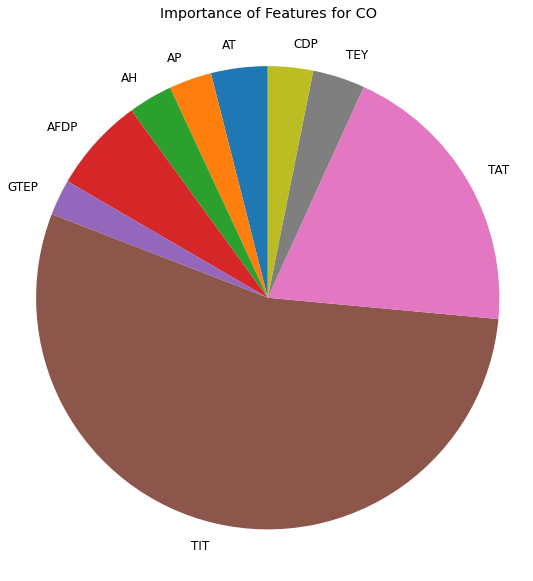

In [30]:
import numpy as np
feature_importances = np.mean([tree.feature_importances_ for tree in bagging2.estimators_], axis=0)
explode = (0, 0, 0, 0, 0, 0, 0,0,0)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)

plt.pie(feature_importances, explode=explode, labels=xtrain.columns.tolist(), startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Importance of Features for CO")
plt.show()

# Feature importances for NOX

In [31]:
bagging = BaggingRegressor(n_jobs=1,random_state=0)
bagging.fit(X=xtrain, y=ytrainNOX.values.ravel())

BaggingRegressor(n_jobs=1, random_state=0)

In [32]:
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
p = bagging.predict(xtest)
print("Test MSE is: " + str(mean_squared_error(p, ytestNOX)))
print("Test MSE is: " + str(mean_squared_error(p, ytestNOX)))

Test MSE is: 148.31002952620545
Test MSE is: 148.31002952620545


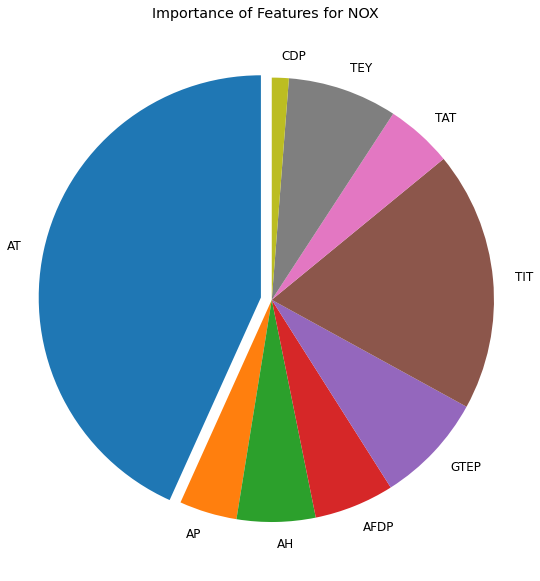

In [33]:
import numpy as np
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
explode = (0.05, 0, 0, 0, 0, 0, 0,0,0)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)

plt.pie(feature_importances, explode=explode, labels=xtrain.columns.tolist(), startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Importance of Features for NOX")
plt.show()

# Feature Standardization
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. Min-max scaling (many people call this normalization). Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # z = (x-mean)/standard deviation
xtrain_standardized= scaler.fit_transform(xtrain)  #fit and transform for train and transform for test
xtest_standardized = scaler.transform(xtest) 
scaler1=StandardScaler()

In [35]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [36]:
xtrain_standardized_pd = pd.DataFrame(xtrain_standardized,columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'])
xtest_standardized_pd = pd.DataFrame(xtest_standardized,columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'])

# Forward selection 5 features for NOX

In [37]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [38]:
sfs.fit(xtrain_standardized_pd,ytrainNOX)
sfs.k_feature_names_     # to get the final set of features by forward selection
# 0: AT 1: AP 2: AH 3: AFDP 4: GTEP 5: TIT 6: TAT 7：TEY 8: CDP

('AT', 'AH', 'GTEP', 'TIT', 'TEY')

# Backward selection 5 features for NOX

In [39]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [40]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=5,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(xtrain_standardized_pd,ytrainNOX)
sbs.k_feature_names_ # 0: AT 1: AP 2: AH 3: AFDP 4: GTEP 5: TIT 6: TAT 7：CDP 8: TEY 

('AT', 'AH', 'TIT', 'TEY', 'CDP')

In [41]:
X_train_sfs=xtrain_standardized_pd[["AT", "AH", "GTEP", "TIT", "TEY"]] #('AT', 'AH', 'GTEP', 'TIT', 'TEY')
X_train_sbs=xtrain_standardized_pd[["AT","AH","TIT","TEY","CDP"]] #('AT', 'AH', 'TIT', 'TEY', 'CDP')

In [42]:
lin_reg=LinearRegression()
sfs5=lin_reg.fit(X_train_sfs, ytrainNOX)
sbs5=lin_reg.fit(X_train_sbs, ytrainNOX)
X_test_sfs5=xtest_standardized_pd[["AT","AH","GTEP","TIT","TEY"]]
X_test_sbs5=xtest_standardized_pd[["AT","AH","TIT","TEY","CDP"]]
sfs5_pred=sfs5.predict(X_test_sfs5)
sbs5_pred=sbs5.predict(X_test_sbs5)

In [43]:
from sklearn.metrics import mean_absolute_error

mae_sfs = mean_absolute_error(ytestNOX, sfs5_pred)
mae_sbs = mean_absolute_error(ytestNOX, sbs5_pred)


print('Forward selection with 5 features NOX Test Accuracy: ', sfs5.score(X_test_sfs5, ytestNOX)) #same as r2_score(y_test, sfs5_pred)
print('Forward selection with 5 features NOX Test MAE:%.3f', mae_sfs)
print('Backward selection with 5 features NOX Test Accuracy: ', sbs5.score(X_test_sbs5, ytestNOX))
print('Backward selection with 5 features NOX Test MAE:%.3f', mae_sbs)

Forward selection with 5 features NOX Test Accuracy:  -2.834558536490337
Forward selection with 5 features NOX Test MAE:%.3f 17.060235104818624
Backward selection with 5 features NOX Test Accuracy:  -0.2551451249128187
Backward selection with 5 features NOX Test MAE:%.3f 10.027667456657637


## Conclusion: 
 - Backward selection gives better model than forward selection for NOX
 - feature number in both forward and backward = 5 

# Forward selection 5 features for CO

In [44]:
sfs.fit(xtrain_standardized_pd,ytrainCO)
sfs.k_feature_names_     # to get the final set of features by forward selection

('AH', 'TIT', 'TAT', 'TEY', 'CDP')

# Backward selection 5 features for CO

In [45]:
sbs.fit(xtrain_standardized_pd,ytrainCO)
sbs.k_feature_names_

('AT', 'AH', 'TAT', 'TEY', 'CDP')

In [46]:
X_train_sfs=xtrain_standardized_pd[["AT", "TIT", "TAT", "TEY", "CDP"]]
X_train_sbs=xtrain_standardized_pd[["AT","AH","TAT","TEY","CDP"]]

In [47]:
sfs5=lin_reg.fit(X_train_sfs, ytrainCO)
sbs5=lin_reg.fit(X_train_sbs, ytrainCO)
X_test_sfs5=xtest_standardized_pd[["AT", "TIT", "TAT", "TEY", "CDP"]]
X_test_sbs5=xtest_standardized_pd[["AT","AH","TAT","TEY","CDP"]]
sfs5_pred=sfs5.predict(X_test_sfs5)
sbs5_pred=sbs5.predict(X_test_sbs5)

In [48]:
mae_sfs_CO = mean_absolute_error(ytestCO, sfs5_pred)
mae_sbs_CO = mean_absolute_error(ytestCO, sbs5_pred)
print('Forward selection with 5 features CO Test Accuracy: ', sfs5.score(X_test_sfs5, ytestCO)) #same as r2_score(y_test, sfs5_pred)
print('Forward selection with 5 features CO Test MAE:%.3f', mae_sfs_CO)
print('Backward selection with 5 features CO Test Accuracy: ', sbs5.score(X_test_sbs5, ytestCO))
print('Backward selection with 5 features CO Test MAE:%.3f', mae_sbs_CO)

Forward selection with 5 features CO Test Accuracy:  0.42824574097069246
Forward selection with 5 features CO Test MAE:%.3f 1.053631130440363
Backward selection with 5 features CO Test Accuracy:  0.39791697005775417
Backward selection with 5 features CO Test MAE:%.3f 1.1125814598994963


## Conclusion: 
- Forward selection gives better model than backward selection for CO
- feature number in both forward and backward = 5

# Best subset selection for NOX


In [49]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [50]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

In [51]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = ytrainNOX
X = pd.DataFrame(xtrain_standardized,columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP'])
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


Loop...:   0%|          | 0/9 [00:00<?, ?it/s]

# Finding the best subsets for each number of features
Using the smallest RSS value, or the largest R_squared value

In [52]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(9))
display(df_max.head(9))

,numb_features,RSS,R_squared,features
0,1,1.715567e+06,0.347190,"(AT,)"
10,2,1.599910e+06,0.391200,"(AT, AH)"
56,3,1.451678e+06,0.447605,"(AT, AH, TEY)"
160,4,1.426432e+06,0.457212,"(AT, AH, TIT, TEY)"
301,5,1.394450e+06,0.469382,"(AT, AH, GTEP, TIT, TEY)"
397,6,1.378139e+06,0.475589,"(AT, AP, AH, TIT, TAT, TEY)"
477,7,1.371957e+06,0.477941,"(AT, AP, AH, GTEP, TIT, TEY, CDP)"
506,8,1.369431e+06,0.478902,"(AT, AP, AH, GTEP, TIT, TAT, TEY, CDP)"
510,9,1.369038e+06,0.479052,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


,numb_features,RSS,R_squared,features
0,1,1.715567e+06,0.347190,"(AT,)"
10,2,1.599910e+06,0.391200,"(AT, AH)"
56,3,1.451678e+06,0.447605,"(AT, AH, TEY)"
160,4,1.426432e+06,0.457212,"(AT, AH, TIT, TEY)"
301,5,1.394450e+06,0.469382,"(AT, AH, GTEP, TIT, TEY)"
397,6,1.378139e+06,0.475589,"(AT, AP, AH, TIT, TAT, TEY)"
477,7,1.371957e+06,0.477941,"(AT, AP, AH, GTEP, TIT, TEY, CDP)"
506,8,1.369431e+06,0.478902,"(AT, AP, AH, GTEP, TIT, TAT, TEY, CDP)"
510,9,1.369038e+06,0.479052,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


# Adding columns to the dataframe with RSS and R squared values of the best subset¶

In [53]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,1.715567e+06,0.347190,"(AT,)",1.715567e+06,0.34719
1,1,2.526332e+06,0.038676,"(AP,)",1.715567e+06,0.34719
2,1,2.560497e+06,0.025676,"(AH,)",1.715567e+06,0.34719
3,1,2.540854e+06,0.033150,"(AFDP,)",1.715567e+06,0.34719
4,1,2.573995e+06,0.020540,"(GTEP,)",1.715567e+06,0.34719


# Plotting the best subset selection process

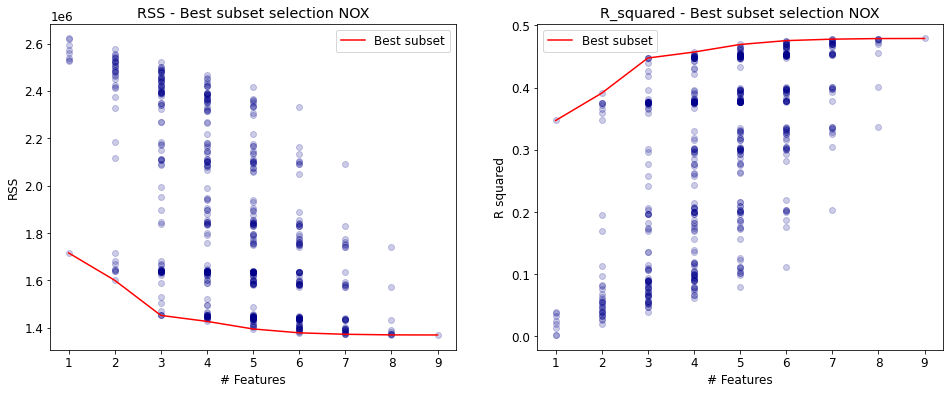

In [54]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection NOX')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection NOX')
ax.legend()

plt.show()

# Best subset selection for CO

In [55]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

In [56]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = ytrainCO
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Loop...:   0%|          | 0/9 [00:00<?, ?it/s]

In [57]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(9))
display(df_max.head(9))

,numb_features,RSS,R_squared,features
5,1,45206.808337,0.565942,"(TIT,)"
41,2,41548.404831,0.601069,"(TIT, CDP)"
70,3,40887.617528,0.607413,"(AT, TAT, TEY)"
162,4,40785.880941,0.608390,"(AT, AH, TAT, TEY)"
309,5,40688.825753,0.609322,"(AT, AH, TAT, TEY, CDP)"
425,6,40612.286680,0.610057,"(AT, AH, AFDP, TAT, TEY, CDP)"
474,7,40583.224710,0.610336,"(AT, AP, AH, AFDP, TAT, TEY, CDP)"
504,8,40560.472330,0.610555,"(AT, AP, AH, AFDP, GTEP, TAT, TEY, CDP)"
510,9,40543.233768,0.610720,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


,numb_features,RSS,R_squared,features
5,1,45206.808337,0.565942,"(TIT,)"
41,2,41548.404831,0.601069,"(TIT, CDP)"
70,3,40887.617528,0.607413,"(AT, TAT, TEY)"
162,4,40785.880941,0.608390,"(AT, AH, TAT, TEY)"
309,5,40688.825753,0.609322,"(AT, AH, TAT, TEY, CDP)"
425,6,40612.286680,0.610057,"(AT, AH, AFDP, TAT, TEY, CDP)"
474,7,40583.224710,0.610336,"(AT, AP, AH, AFDP, TAT, TEY, CDP)"
504,8,40560.472330,0.610555,"(AT, AP, AH, AFDP, GTEP, TAT, TEY, CDP)"
510,9,40543.233768,0.610720,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


In [58]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,102730.467555,0.013623,"(AT,)",45206.808337,0.565942
1,1,104090.850575,0.000561,"(AP,)",45206.808337,0.565942
2,1,99650.806259,0.043193,"(AH,)",45206.808337,0.565942
3,1,84654.581425,0.187181,"(AFDP,)",45206.808337,0.565942
4,1,69188.895678,0.335676,"(GTEP,)",45206.808337,0.565942


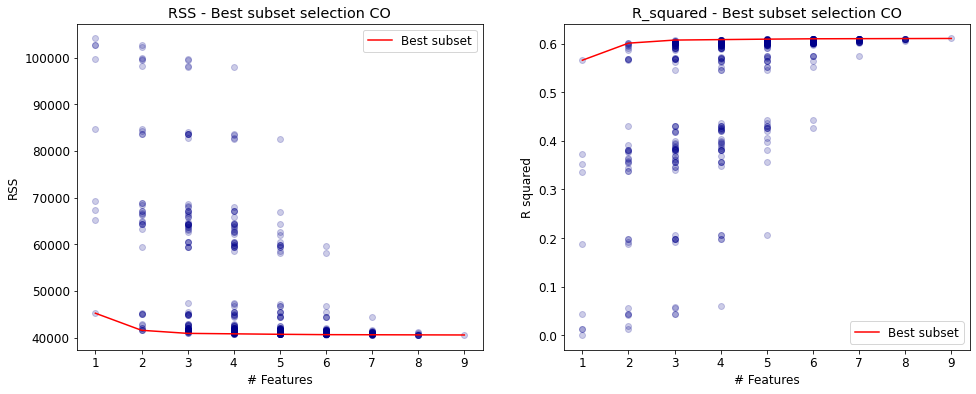

In [59]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection CO')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection CO')
ax.legend()

plt.show()

# Feature Extraction


Text(0, 0.5, 'cumulative explained variance')

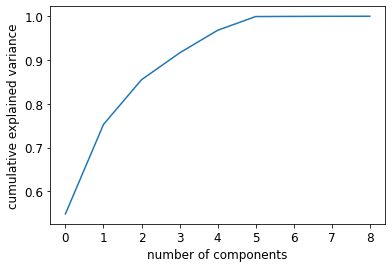

In [60]:
from sklearn.decomposition import PCA
pca = PCA().fit(xtrain_standardized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') #based on the graph we know that we can
                                            #reduce the number of components to 6 features

In [61]:

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(xtrain_standardized) #just need to fittransform for training and transform for test
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])

In [62]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-0.338795,-1.638457,-0.584658,-0.786033,-0.380398,1.022767
1,-0.366635,-1.660099,-0.509738,-0.800218,-0.381037,1.055629
2,-0.283407,-1.718467,-0.486952,-0.851234,-0.384437,1.069161
3,-0.319137,-1.751221,-0.455569,-0.856190,-0.368827,1.072612
4,-0.373658,-1.721796,-0.404415,-0.789787,-0.369656,1.093035


In [63]:
xtrain_standardized[0]


array([-1.79599517,  0.93182044,  0.29175432, -0.56206268, -0.3072675 ,
        0.19000154,  0.55305345,  0.0787172 , -0.13703546])

In [64]:
pca.components_ #Loading vectors of PCA
i=0
for x in range(len(pca.components_[0])):
    print(i,pca.components_[0][x],xtest.columns[x]) #CDP,GTEP,and TEY  are the most important features in PCA without outputs
    i=i+1

0 -0.03924761574615211 AT
1 0.09167031990458677 AP
2 -0.09929195122069298 AH
3 0.3369873158202062 AFDP
4 0.44511816343160715 GTEP
5 0.39763570528326414 TIT
6 -0.3411589952978217 TAT
7 0.4413175130393252 TEY
8 0.44636520203218594 CDP


In [65]:
pca.explained_variance_ratio_ #first principal component is responsible for 54.83%
                                #second principal component is responsible for 20.43%
                                #third principal component is responsible for 10.23%
                                #fourth principal component is responsible for 6.12%
                                #fifth principal component is responsible for 5.18%
                                #sixth principal component is responsible for 3.14%

array([0.54830462, 0.20433067, 0.10226583, 0.0611828 , 0.05179213,
       0.03142549])

In [66]:
sum1=0
for x in pca.explained_variance_ratio_:
    sum1= x+ sum1
sum1 ##covered 99.93% of data

0.9993015452280579

In [67]:
xtest_standardizedpca = pca.transform(xtest_standardized) ## apply dimensionality reduction on test input data 

In [68]:
xtest_standardizedpca.shape

(14542, 6)

# Model Development

In [69]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score,cross_val_predict
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import PolynomialFeatures

# Linear regression

In [70]:
regr = skl_lm.LinearRegression().fit(principalDf,ytrainCO)
pred = regr.predict(xtest_standardizedpca)
testerrorlinear= mean_squared_error(ytestCO,pred)
print("MSE of the test error of linear regression ",testerrorlinear)
print("The accuracy of linear regression", regr.score(xtest_standardizedpca,ytestCO))

MSE of the test error of linear regression  2.6036989401255326
The accuracy of linear regression 0.456804281348022


In [71]:
regr = skl_lm.LinearRegression().fit(principalDf,ytrainNOX)
pred = regr.predict(xtest_standardizedpca)
testerrorlinear= mean_squared_error(ytestNOX,pred)
print("MSE of the test error of linear regression ",testerrorlinear)
print("The accuracy of linear regression", regr.score(xtest_standardizedpca,ytestNOX))

MSE of the test error of linear regression  166.2461035794702
The accuracy of linear regression -0.4861138080095837


# Polynomial regression

FOR CO:

Best degree 2 with RMSE 1.3626183964137935 for CO


Text(0, 0.5, 'RMSE')

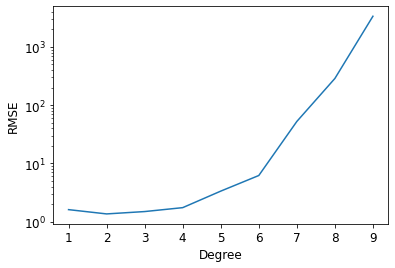

In [72]:
poly_cv = []
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg)
    x_poly_train = poly_features.fit_transform(principalDf)

    # Linear regression
    poly_reg = skl_lm.LinearRegression()
    poly_reg.fit(x_poly_train, ytrainCO)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(xtest_standardizedpca)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(ytestCO, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {} for CO'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Based on the graph above, the best degree of polynomial with lowest RMSE is 2nd degree of polynomial for CO

FOR NOX:

Best degree 1 with RMSE 12.893645860634996 for NOX


Text(0, 0.5, 'RMSE')

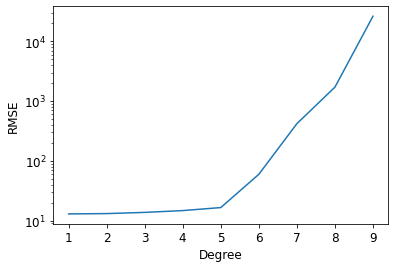

In [73]:
poly_cv = []
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg)
    x_poly_train = poly_features.fit_transform(principalDf)

    # Linear regression
    poly_reg = skl_lm.LinearRegression()
    poly_reg.fit(x_poly_train, ytrainNOX)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(xtest_standardizedpca)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(ytestNOX, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {} for NOX'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Based on the graph above, the best degree of polynomial with lowest RMSE is 1st degree of polynomial for NOX, but for project purpose we will use 2nd degree for comparison

In [74]:
# Polynomial Regression for CO
import statsmodels.api as sm
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(principalDf)
results = sm.OLS(ytrainCO,x_poly).fit()
print(results.summary())

## P >|t|  is p-value
#3 input variables

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1928.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        20:12:37   Log-Likelihood:                -34495.
No. Observations:               21680   AIC:                         6.905e+04
Df Residuals:                   21652   BIC:                         6.927e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3301      0.034     68.053      0.0

In [75]:
import statsmodels.api as sm   ## for NOX
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(principalDf)
results = sm.OLS(ytrainNOX,x_poly).fit()
print(results.summary())

## P >|t|  is p-value
#3 input variables

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     2425.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        20:12:37   Log-Likelihood:                -67677.
No. Observations:               21680   AIC:                         1.354e+05
Df Residuals:                   21652   BIC:                         1.356e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6585      0.158    421.345      0.0

# Decision Tree (CO)

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
parameters = {'max_depth':range(1,30)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, cv=10,
                   scoring=mse_scorer,return_train_score=True)
clf.fit(X=principalDf, y=ytrainCO)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-2.031764010688537 {'max_depth': 4}


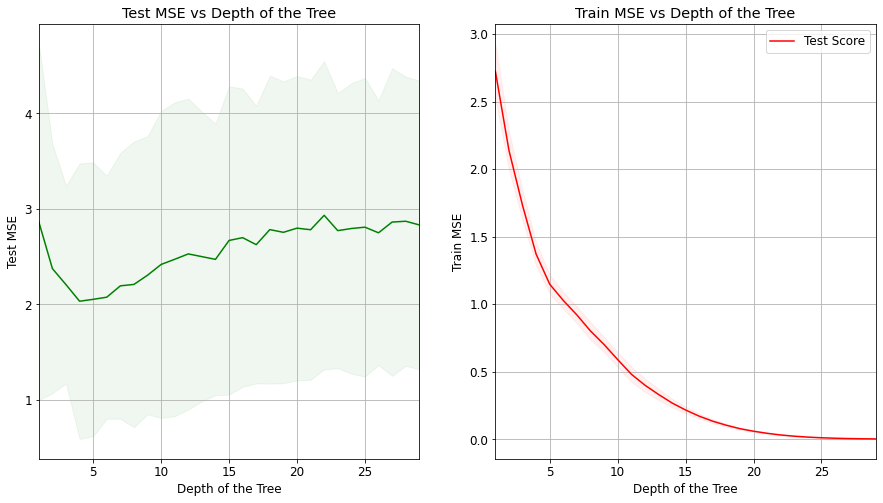

In [77]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = abs(clf.cv_results_['mean_test_score'][idx]) 
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = abs(clf.cv_results_['mean_train_score'][idx])
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

lists = sorted(test_MSE.items())
x, y = zip(*lists)

lists = sorted(test_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(train_MSE.items())
x, y = zip(*lists)

lists = sorted(train_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

plt.legend()
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(principalDf, ytrainCO)

DecisionTreeRegressor(max_depth=4)

In [79]:
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        print("Could not run dot, ie graphviz, to " 
             "produce visualization")

visualize_tree(dt, principalDf.columns.tolist())

p = dt.predict(xtest_standardizedpca)
print("MSE : " + str(mean_squared_error(ytestCO,p)))

Could not run dot, ie graphviz, to produce visualization
MSE : 2.4713549910686714


In [80]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

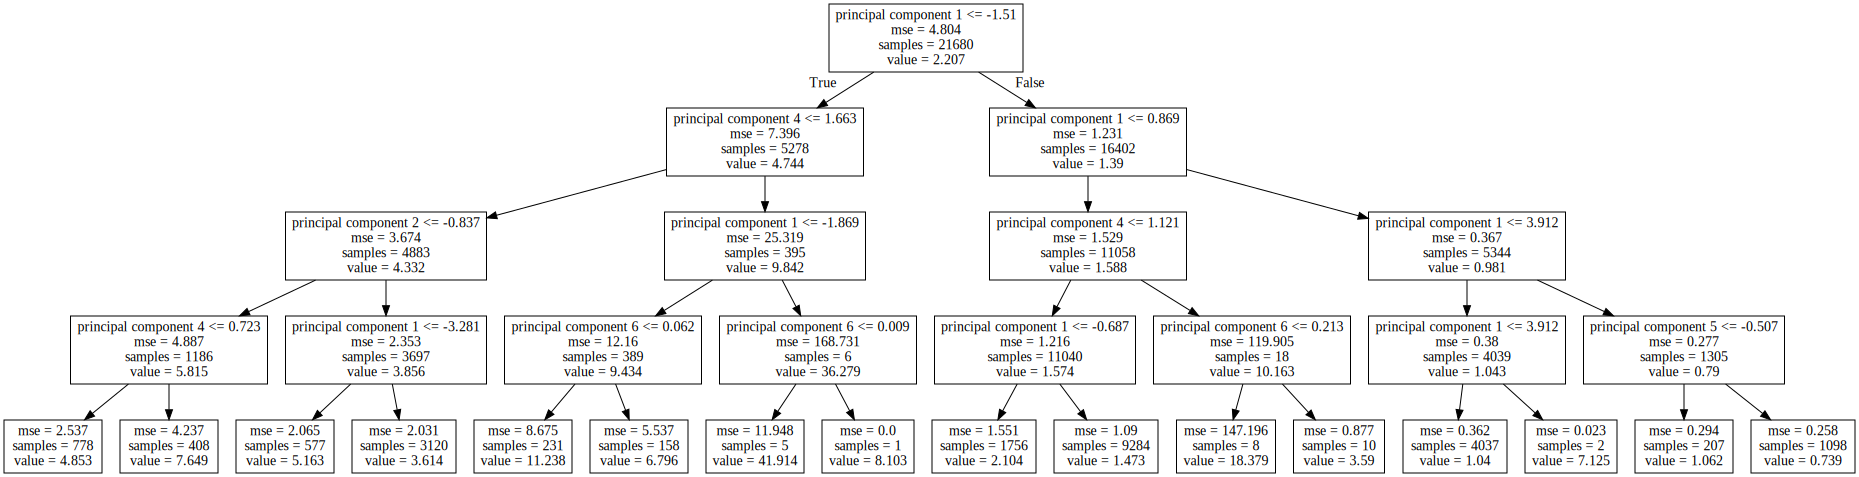

In [81]:
export_graphviz(dt , out_file="mytree1.dot", feature_names=principalDf.columns)
with open("mytree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph,format="png")

In [82]:
tree_predictions = dt.predict(principalDf)
tree_mse = mean_squared_error(ytrainCO, tree_predictions)
tree_mse


1.3839316011731133

In [83]:
testtreepred = dt.predict(xtest_standardizedpca)
testtree_mse = mean_squared_error(ytestCO,testtreepred)
testtree_mse

2.4713549910686714

# DecisionTree(NOX)

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
parameters = {'max_depth':range(1,30)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, cv=10,
                   scoring=mse_scorer,return_train_score=True)
clf.fit(X=principalDf, y=ytrainNOX)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-44.89162168145897 {'max_depth': 7}


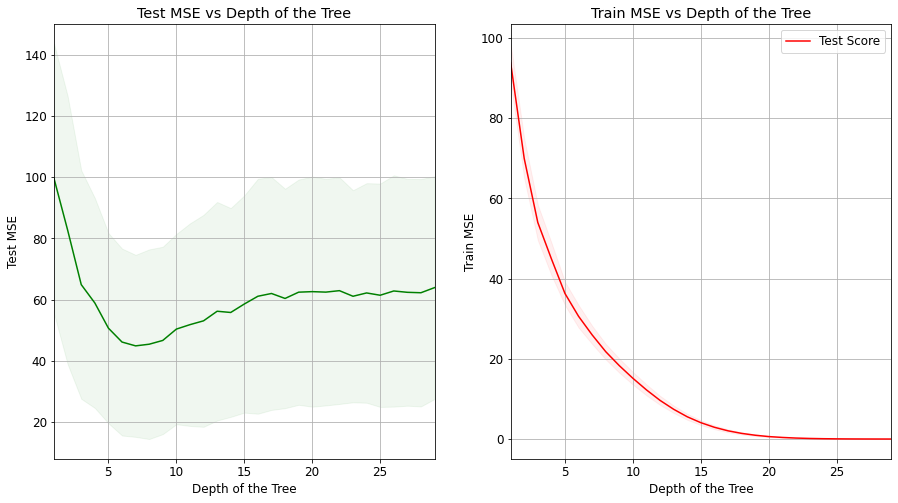

In [85]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = abs(clf.cv_results_['mean_test_score'][idx]) 
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = abs(clf.cv_results_['mean_train_score'][idx])
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

lists = sorted(test_MSE.items())
x, y = zip(*lists)

lists = sorted(test_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(train_MSE.items())
x, y = zip(*lists)

lists = sorted(train_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

plt.legend()
plt.show()

In [86]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7)
dt.fit(principalDf, ytrainNOX)

DecisionTreeRegressor(max_depth=7)

In [87]:
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        print("Could not run dot, ie graphviz, to "
             "produce visualization")

visualize_tree(dt, principalDf.columns.tolist())

p = dt.predict(xtest_standardizedpca)
print("MSE : " + str(mean_squared_error(ytestNOX,p)))

Could not run dot, ie graphviz, to produce visualization
MSE : 156.1244593825751


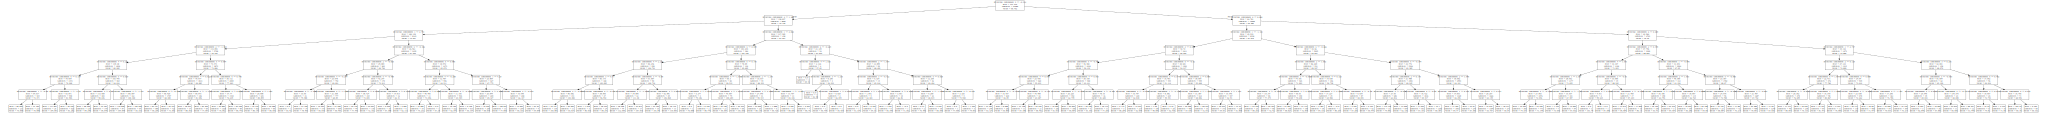

In [88]:
export_graphviz(dt , out_file="mytree1.dot", feature_names=principalDf.columns)
with open("mytree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph,format="png")

In [89]:
tree_predictions = dt.predict(principalDf)
tree_mse = mean_squared_error(ytrainNOX, tree_predictions)
tree_mse


27.034321565899475

In [90]:
dt1 = DecisionTreeRegressor(max_depth=7)
dt1.fit(principalDf, ytrainNOX)
testtreepred = dt1.predict(xtest_standardizedpca)
testtree_mse = mean_squared_error(ytestNOX,testtreepred)
testtree_mse

155.43662494342593

# Random Forest

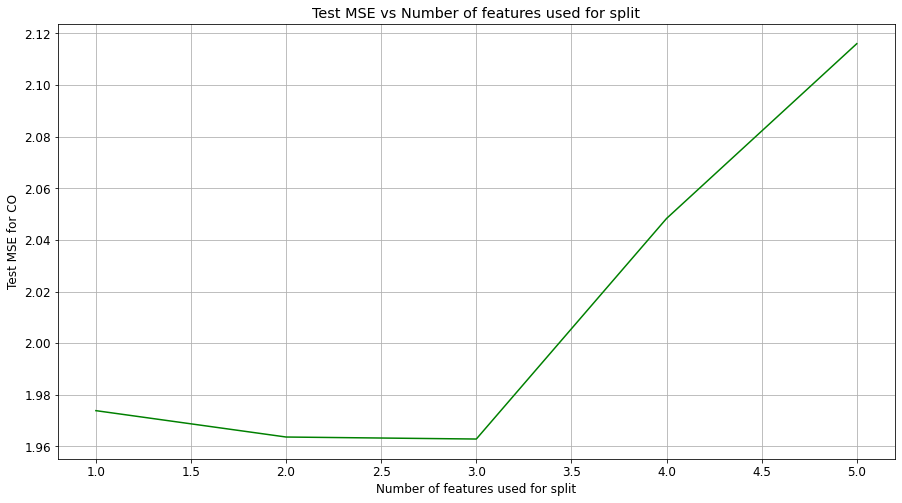

In [91]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_m(X_train, Y_train, X_test, Y_test, features):
    test_MSE = {}
    for m in features:
        regr = RandomForestRegressor(random_state=0, max_features=m)
        regr.fit(X_train, Y_train)
        p = regr.predict(X_test)
        test_MSE[m] = mean_squared_error(p, Y_test)
    return test_MSE

test_MSE = random_forest_m(principalDf, ytrainCO.values.ravel(), xtest_standardizedpca, ytestCO.values.ravel(),
                             np.arange(1,len(principalDf.columns.tolist()),1))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE.items())
x, y = zip(*lists)
plt.plot(x, y, color='g')

ax.set_xlabel('Number of features used for split')
ax.set_ylabel('Test MSE for CO')
ax.set_title('Test MSE vs Number of features used for split')

plt.grid(b=True)
plt.show()

In [92]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_features='sqrt')
random_forest.fit(X=principalDf, y=ytrainCO.values.ravel())
p = random_forest.predict(xtest_standardizedpca)
print("Test MSE is: " + str(mean_squared_error(p, ytestCO)))

Test MSE is: 1.924932100099082


In [93]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in random_forest.estimators_
], axis=0)

In [94]:
feature_importances

array([0.46553532, 0.12607366, 0.0501649 , 0.21422433, 0.07286689,
       0.0711349 ])

1st PCA is the most importances features for random tree followed by 4th PCA and 2nd PCA.

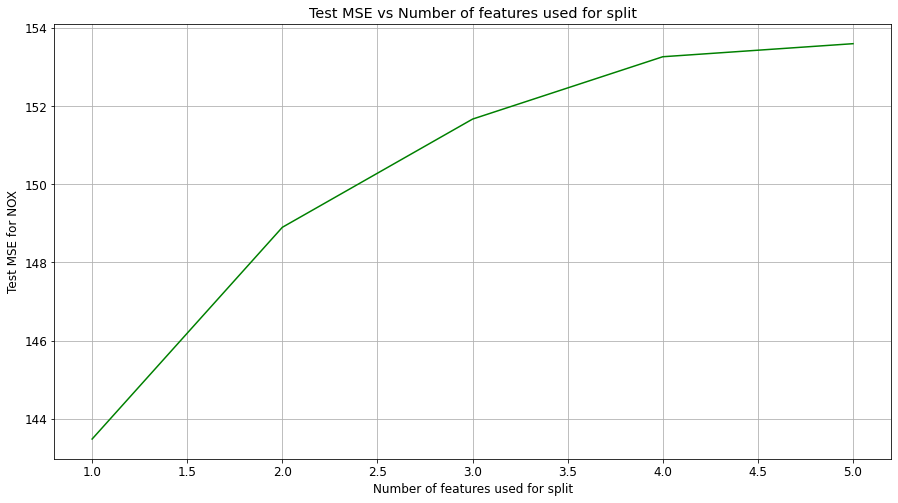

In [95]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_m(X_train, Y_train, X_test, Y_test, features):
    test_MSE = {}
    for m in features:
        regr = RandomForestRegressor(random_state=0, max_features=m)
        regr.fit(X_train, Y_train)
        p = regr.predict(X_test)
        test_MSE[m] = mean_squared_error(p, Y_test)
    return test_MSE

test_MSE = random_forest_m(principalDf, ytrainNOX.values.ravel(), xtest_standardizedpca, ytestNOX.values.ravel(),
                             np.arange(1,len(principalDf.columns.tolist()),1))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE.items())
x, y = zip(*lists)
plt.plot(x, y, color='g')

ax.set_xlabel('Number of features used for split')
ax.set_ylabel('Test MSE for NOX')
ax.set_title('Test MSE vs Number of features used for split')

plt.grid(b=True)
plt.show()

In [96]:
random_forest = RandomForestRegressor(max_features=1)
random_forest.fit(X=principalDf, y=ytrainNOX.values.ravel())
p = random_forest.predict(xtest_standardizedpca)
print("Test MSE is: " + str(mean_squared_error(p, ytestNOX)))

Test MSE is: 142.1918629957829


In [97]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in random_forest.estimators_
], axis=0)
feature_importances

array([0.15926434, 0.25319231, 0.08172694, 0.18673691, 0.10472644,
       0.21435306])

2nd PCA is most important for random tree for NOX followed by 6th PCA and 4st PCA

# Fine-tune your models & Feature Set:

# Ridge Regression on NOX
- comment on findings

training score for linear: 0.479051806751685
test score for linear:  0.03364773984718239
training score for alpha=0.01: 0.47905180447135576
test score for alpha =0.01:  0.033374491001975426
training score for alpha=100: 0.4654195611943728
test score for alpha =100:  -0.47492476572672926


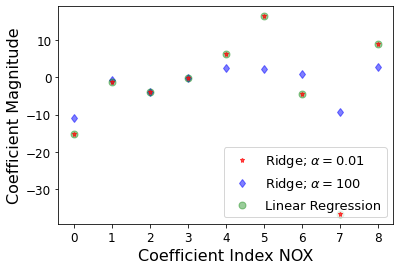

In [98]:
lr = LinearRegression()
lr.fit(xtrain_standardized_pd, ytrainNOX)
rr=Ridge(alpha=0.01)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(xtrain_standardized_pd, ytrainNOX)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(xtrain_standardized_pd, ytrainNOX)
train_score=lr.score(xtrain_standardized_pd, ytrainNOX)
test_score=lr.score(xtest_standardized_pd, ytestNOX)

print("training score for linear:", train_score )
print("test score for linear: ", test_score)


Ridge_train_score = rr.score(xtrain_standardized_pd,ytrainNOX)
Ridge_test_score = rr.score(xtest_standardized_pd, ytestNOX)
print ("training score for alpha=0.01:", Ridge_train_score )
print ("test score for alpha =0.01: ", Ridge_test_score)

Ridge_train_score100 = rr100.score(xtrain_standardized_pd,ytrainNOX)
Ridge_test_score100 = rr100.score(xtest_standardized_pd, ytestNOX)
print ("training score for alpha=100:", Ridge_train_score100 )
print ("test score for alpha =100: ", Ridge_test_score100)

rrcoef=[]
for x in rr.coef_[0]:
    rrcoef.append(x)

rr100coef=[]
for x in rr100.coef_[0]:
    rr100coef.append(x)

lrcoef=[]
for x in lr.coef_[0]:
    lrcoef.append(x)

plt.plot(rrcoef,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100coef,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lrcoef,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index NOX',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Let’s understand the figure above. In X axis we plot the coefficient index and, for this data there are 9 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 0,4,5,6,7,8 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

# Lasso Regression on NOX
- comment on findings

training score: 0.3872984740475146
test score:  -0.2749318813949113
number of features used:  3
training score for alpha=0.01: 0.47707379710221
test score for alpha =0.01:  -0.2560205931064288
number of features used: for alpha =0.01: 9
training score for alpha=0.0001: 0.479051601842003
test score for alpha =0.0001:  0.031189225747585092
number of features used: for alpha =0.0001: 9
LR training score: 0.479051806751685
LR test score:  0.03364773984718239


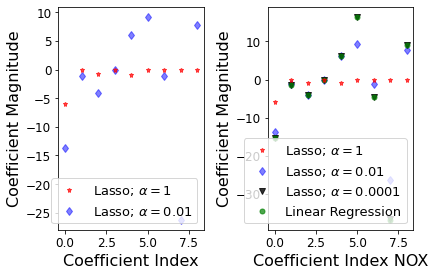

In [99]:
lasso = Lasso()
lasso.fit(xtrain_standardized_pd,ytrainNOX)
train_score=lasso.score(xtrain_standardized_pd,ytrainNOX)
test_score=lasso.score(xtest_standardized_pd,ytestNOX)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain_standardized_pd,ytrainNOX)
train_score001=lasso001.score(xtrain_standardized_pd,ytrainNOX)
test_score001=lasso001.score(xtest_standardized_pd,ytestNOX)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain_standardized_pd,ytrainNOX)
train_score00001=lasso00001.score(xtrain_standardized_pd,ytrainNOX)
test_score00001=lasso00001.score(xtest_standardized_pd,ytestNOX)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(xtrain_standardized_pd,ytrainNOX)
lr_train_score=lr.score(xtrain_standardized_pd,ytrainNOX)
lr_test_score=lr.score(xtest_standardized_pd,ytestNOX)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

lrcoef=[]
for x in lr.coef_[0]:
    lrcoef.append(x)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.plot(lrcoef,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index NOX',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Let’s understand the plot and the code in a short summary.
The default value of regularization parameter in Lasso regression (given by α) is 1.
With this, out of 9 features in the train data-set, only 3 features are used (non zero value of the coefficient).
Both training and test score (with only 3 features) are low; conclude that the model is under-fitting the NOX data-set.
Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =9, training and test score increases.
Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
Further reduce α =0.0001, non-zero features = 9. Training and test scores are similar to basic linear regression case.
In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance

just Linear regression is better than Lasso regression from both training and testing score

# Conclusion: 
- No feature should be eliminated if using regression for NOX

# Ridge Regression on CO

training score for linear: 0.6107201253359902
test score for linear:  0.2739910513775822
training score for alpha=0.01: 0.6107201248304697
test score for alpha =0.01:  0.27412666014736853
training score for alpha=100: 0.607870964809881
test score for alpha =100:  0.44142605063040763


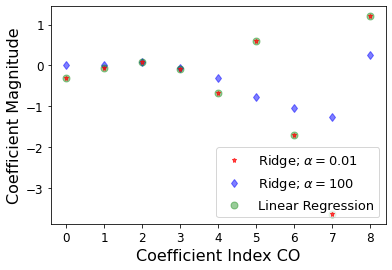

In [100]:
lr = LinearRegression()
lr.fit(xtrain_standardized_pd, ytrainCO)
rr=Ridge(alpha=0.01)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(xtrain_standardized_pd, ytrainCO)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(xtrain_standardized_pd, ytrainCO)
train_score=lr.score(xtrain_standardized_pd, ytrainCO)
test_score=lr.score(xtest_standardized_pd, ytestCO)
print("training score for linear:", train_score )
print("test score for linear: ", test_score)


Ridge_train_score = rr.score(xtrain_standardized_pd,ytrainCO)
Ridge_test_score = rr.score(xtest_standardized_pd, ytestCO)
print ("training score for alpha=0.01:", Ridge_train_score )
print ("test score for alpha =0.01: ", Ridge_test_score)

Ridge_train_score100 = rr100.score(xtrain_standardized_pd,ytrainCO)
Ridge_test_score100 = rr100.score(xtest_standardized_pd, ytestCO)
print ("training score for alpha=100:", Ridge_train_score100 )
print ("test score for alpha =100: ", Ridge_test_score100)

rrcoef=[]
for x in rr.coef_[0]:
    rrcoef.append(x)

rr100coef=[]
for x in rr100.coef_[0]:
    rr100coef.append(x)

lrcoef=[]
for x in lr.coef_[0]:
    lrcoef.append(x)

plt.plot(rrcoef,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100coef,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lrcoef,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index CO',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Let’s understand the figure above. In X axis we plot the coefficient index and, for this data there are 9 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 0,4,5,6,7,8 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression

# Lasso Regression on CO
comment on findings

training score: 0.3577796848935252
test score:  0.3140974371053543
number of features used:  1
training score for alpha=0.01: 0.6064688843515743
test score for alpha =0.01:  0.47371646437078807
number of features used: for alpha =0.01: 6
training score for alpha=0.0001: 0.6107127550297009
test score for alpha =0.0001:  0.29457144299768023
number of features used: for alpha =0.0001: 9
LR training score: 0.6107201253359902
LR test score:  0.2739910513775822


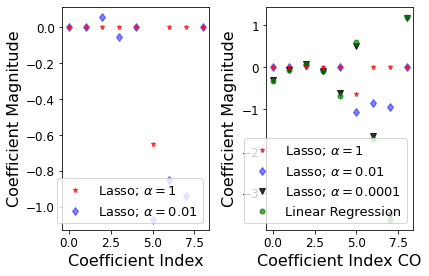

In [101]:
lasso = Lasso()
lasso.fit(xtrain_standardized_pd,ytrainCO)
train_score=lasso.score(xtrain_standardized_pd,ytrainCO)
test_score=lasso.score(xtest_standardized_pd,ytestCO)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain_standardized_pd,ytrainCO)
train_score001=lasso001.score(xtrain_standardized_pd,ytrainCO)
test_score001=lasso001.score(xtest_standardized_pd,ytestCO)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain_standardized_pd,ytrainCO)
train_score00001=lasso00001.score(xtrain_standardized_pd,ytrainCO)
test_score00001=lasso00001.score(xtest_standardized_pd,ytestCO)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(xtrain_standardized_pd,ytrainCO)
lr_train_score=lr.score(xtrain_standardized_pd,ytrainCO)
lr_test_score=lr.score(xtest_standardized_pd,ytestCO)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

lrcoef=[]
for x in lr.coef_[0]:
    lrcoef.append(x)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.plot(lrcoef,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index CO',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Let’s understand the plot and the code in a short summary. The default value of regularization parameter in Lasso regression (given by α) is 1. With this, out of 9 features in the train data-set, only 1 features are used (non zero value of the coefficient). Both training and test score (with only 1 features) are low; conclude that the model is under-fitting the CO data-set. Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =6, training and test score increases. Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01. Further reduce α =0.0001, non-zero features = 9. Training and test scores are similar to basic linear regression case. In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance

# Conclusion:
- Just Linear regression is better than Lasso regression from training score for CO
- Lasso regression with alpha ~ 0.01 is best for testing score for CO

# Performances (CO)

# Linear Regression

In [102]:
from sklearn.metrics import r2_score,mean_absolute_error
regr = skl_lm.LinearRegression().fit(principalDf,ytrainCO)

testpred = regr.predict(xtest_standardizedpca)
trainpred = regr.predict(principalDf)

testerrorlinear= mean_squared_error(ytestCO,testpred)
trainerrorlinear = mean_squared_error(ytrainCO,trainpred)
adjustedr2linear = 1 - (1-r2_score(ytestCO,testpred))*(len(testpred)-1)/(len(testpred)-xtest_standardizedpca.shape[1]-1)

print("MSE of the train error of linear regression for CO is",trainerrorlinear)
print("MSE of the test error of linear regression for CO is ",testerrorlinear)
print('Linear Regression model CO prediction Test MAE: %.3f' % mean_absolute_error(ytestCO, testpred))
print("The R2 of linear regression for CO is", r2_score(ytestCO,testpred))
print("The adjusted R2 of linear regression for CO is",adjustedr2linear)


MSE of the train error of linear regression for CO is 1.8954900391437934
MSE of the test error of linear regression for CO is  2.6036989401255326
Linear Regression model CO prediction Test MAE: 1.052
The R2 of linear regression for CO is 0.456804281348022
The adjusted R2 of linear regression for CO is 0.4565800519491976


# Polynomial Regression

In [103]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(principalDf)
model = skl_lm.LinearRegression()
model.fit(x_poly, ytrainCO)

testpredpoly = model.predict(poly.fit_transform(xtest_standardizedpca))
trainpredpoly = model.predict(x_poly)

testerrorpoly= mean_squared_error(ytestCO,testpredpoly)
trainerrorpoly = mean_squared_error(ytrainCO,trainpredpoly)
adjustedr2poly = 1 - (1-r2_score(ytestCO,testpredpoly))*(len(testpredpoly)-1)/(len(testpredpoly)-xtest_standardizedpca.shape[1]-1)
print("MSE of the train error of polynomial regression for CO is ",trainerrorpoly)
print("MSE of the test error of polynomial regression for CO is",testerrorpoly)
print('Polynomial Regression model CO prediction Test MAE: %.3f' % mean_absolute_error(ytestCO, testpredpoly))
print("The R2 of polynomial regression for CO is", r2_score(ytestCO,testpredpoly))
print("The adjusted R2 of polynomial regression for CO is",adjustedr2poly)

MSE of the train error of polynomial regression for CO is  1.4110774272781523
MSE of the test error of polynomial regression for CO is 1.8567288942452977
Polynomial Regression model CO prediction Test MAE: 0.846
The R2 of polynomial regression for CO is 0.6126406281047068
The adjusted R2 of polynomial regression for CO is 0.6124807274351938


# Random Forest

In [104]:
random_forest = RandomForestRegressor(max_features="sqrt")
random_forest.fit(X=principalDf, y=ytrainCO.values.ravel())

p = random_forest.predict(xtest_standardizedpca)
randompred = random_forest.predict(principalDf)

testerrorrandom = mean_squared_error(p, ytestCO)
trainerrorrandom = mean_squared_error(randompred, ytrainCO)
adjustedr2rf=1 - (1-r2_score(ytestCO,p))*(len(p)-1)/(len(p)-xtest_standardizedpca.shape[1]-1)

print("MSE of the train error of random forest regression for CO is ",trainerrorrandom)
print("MSE of the test error of random forest regression for CO is",testerrorrandom)
print('Random Forest Regression model CO prediction Test MAE: %.3f' % mean_absolute_error(ytestCO, p))
print("The R2 of random forest regression for CO is", r2_score(ytestCO,p))
print("The adjusted R2 of random forest regression for CO is",adjustedr2rf)

MSE of the train error of random forest regression for CO is  0.13568495869946842
MSE of the test error of random forest regression for CO is 1.9362230844078503
Random Forest Regression model CO prediction Test MAE: 0.823
The R2 of random forest regression for CO is 0.5960561823807619
The adjusted R2 of random forest regression for CO is 0.5958894357068221


# Decision Tree

In [105]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(principalDf, ytrainCO)
dtpredtest = dt.predict(xtest_standardizedpca)
dtpredtrain = dt.predict(principalDf)

testerrordt = mean_squared_error(dtpredtest, ytestCO)
trainerrordt = mean_squared_error(dtpredtrain, ytrainCO)
adjustedr2dt= 1 - (1- r2_score(ytestCO,dtpredtest))*(len(dtpredtest)-1)/(len(dtpredtest)-xtest_standardizedpca.shape[1]-1)
print("MSE of the train error of decision tree regression for CO is",trainerrordt)
print("MSE of the test error of decision tree regression for CO is",testerrordt)
print('Decision Tree Regression model CO prediction Test MAE: %.3f' % mean_absolute_error(ytestCO, dtpredtest))
print("The R2 of decision tree regression for CO is", r2_score(ytestCO,dtpredtest))
print("The adjusted R2 of decision tree regression for CO is",adjustedr2dt)

MSE of the train error of decision tree regression for CO is 1.3839316011731133
MSE of the test error of decision tree regression for CO is 2.4724693882884483
Decision Tree Regression model CO prediction Test MAE: 0.884
The R2 of decision tree regression for CO is 0.4841819975731878
The adjusted R2 of decision tree regression for CO is 0.4839690696052097


# KNN Regressor

In [106]:
from sklearn.neighbors import KNeighborsRegressor
# define model
KNeighborsRegressor = KNeighborsRegressor()
# fit model
KNeighborsRegressor.fit(principalDf, ytrainCO)
yCOpred_KNeighborsRegressor = KNeighborsRegressor.predict(xtest_standardizedpca)
ytrainCOpred_KNeighborsRegressor = KNeighborsRegressor.predict(principalDf)
adjustedr2KNN=1 - (1- r2_score(ytestCO,yCOpred_KNeighborsRegressor))*(len(yCOpred_KNeighborsRegressor)-1)/(len(yCOpred_KNeighborsRegressor)-xtest_standardizedpca.shape[1]-1)
print("KNeighborsRegressor model CO prediction Train MSE is: " + str(mean_squared_error(ytrainCOpred_KNeighborsRegressor, ytrainCO)))
print("KNeighborsRegressor model CO prediction Test MSE is: " + str(mean_squared_error(yCOpred_KNeighborsRegressor, ytestCO)))
print('Decision Tree Regression model CO prediction Test MAE: %.3f' % mean_absolute_error(ytestCO, yCOpred_KNeighborsRegressor))
print("The R2 of KNN regression", r2_score(ytestCO,yCOpred_KNeighborsRegressor))
print("The adjusted R2 of KNN regression ",adjustedr2KNN)

KNeighborsRegressor model CO prediction Train MSE is: 0.6532173633613819
KNeighborsRegressor model CO prediction Test MSE is: 2.359653581776477
Decision Tree Regression model CO prediction Test MAE: 0.928
The R2 of KNN regression 0.507718153059205
The adjusted R2 of KNN regression  0.5075149407384865


Overall

# Performances (CO)

In [107]:
print("MSE of the test error of linear regression ",testerrorlinear)
print("MSE of the test error of polynomial regression ",testerrorpoly)
print("MSE of the test error of random forest regression ",testerrorrandom)
print("MSE of the test error of decision tree regression ",testerrordt)
print("KNeighborsRegressor model CO prediction Test MSE is: " + str(mean_squared_error(yCOpred_KNeighborsRegressor, ytestCO)))

MSE of the test error of linear regression  2.6036989401255326
MSE of the test error of polynomial regression  1.8567288942452977
MSE of the test error of random forest regression  1.9362230844078503
MSE of the test error of decision tree regression  2.4724693882884483
KNeighborsRegressor model CO prediction Test MSE is: 2.359653581776477


In [108]:
print("The R2 of linear regression", r2_score(ytestCO,testpred))
print("The R2 of polynomial regression", r2_score(ytestCO,testpredpoly))
print("The R2 of random forest regression", r2_score(ytestCO,p))
print("The R2 of decision tree regression", r2_score(ytestCO,dtpredtest))
print("The R2 of KNN regression", r2_score(ytestCO,yCOpred_KNeighborsRegressor))


The R2 of linear regression 0.456804281348022
The R2 of polynomial regression 0.6126406281047068
The R2 of random forest regression 0.5960561823807619
The R2 of decision tree regression 0.4841819975731878
The R2 of KNN regression 0.507718153059205


For CO:
Test error :  Polynomial (degree=2)> Random forest(max_features= 'sqrt')>  KNN Regressor(cv=5)  > Decision Tree (depth =4) >Linear


 R2 : Polynomial(degree=2) > Random forest(max_features= 'sqrt') > KNN Regressor(cv=5) > Decision Tree (depth =4)> Linear 

# Performances (NOX)

In [109]:
from sklearn.metrics import r2_score
regr = skl_lm.LinearRegression().fit(principalDf,ytrainNOX)

testpred = regr.predict(xtest_standardizedpca)
trainpred = regr.predict(principalDf)

testerrorlinear= mean_squared_error(ytestNOX,testpred)
trainerrorlinear = mean_squared_error(ytrainNOX,trainpred)
adjustedr2linear = 1 - (1-r2_score(ytestNOX,testpred))*(len(testpred)-1)/(len(testpred)-xtest_standardizedpca.shape[1]-1)

print("MSE of the train error of linear regression ",trainerrorlinear)
print("MSE of the test error of linear regression ",testerrorlinear)
print("The R2 of linear regression", r2_score(ytestNOX,testpred))
print("The adjusted R2 of linear regression ",adjustedr2linear)

MSE of the train error of linear regression  66.35025972364097
MSE of the test error of linear regression  166.2461035794702
The R2 of linear regression -0.4861138080095837
The adjusted R2 of linear regression  -0.4867272708818271


In [110]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(principalDf)
model = skl_lm.LinearRegression()
model.fit(x_poly, ytrainNOX)

testpredpoly = model.predict(poly.fit_transform(xtest_standardizedpca))
trainpredpoly = model.predict(x_poly)

testerrorpoly= mean_squared_error(ytestNOX,testpredpoly)
trainerrorpoly = mean_squared_error(ytrainNOX,trainpredpoly)
adjustedr2poly = 1 - (1-r2_score(ytestNOX,testpredpoly))*(len(testpredpoly)-1)/(len(testpredpoly)-xtest_standardizedpca.shape[1]-1)
print("MSE of the train error of polynomial regression ",trainerrorpoly)
print("MSE of the test error of polynomial regression ",testerrorpoly)
print("The R2 of polynomial regression", r2_score(ytestNOX,testpredpoly))
print("The adjusted R2 of polynomial regression ",adjustedr2poly)

MSE of the train error of polynomial regression  30.126264663483923
MSE of the test error of polynomial regression  170.47604533777067
The R2 of polynomial regression -0.5239262722943885
The adjusted R2 of polynomial regression  -0.5245553440270176


In [111]:
random_forest = RandomForestRegressor(max_features=1)
random_forest.fit(X=principalDf, y=ytrainNOX.values.ravel())

p = random_forest.predict(xtest_standardizedpca)
randompred = random_forest.predict(principalDf)

testerrorrandom = mean_squared_error(p, ytestNOX)
trainerrorrandom = mean_squared_error(randompred, ytrainNOX)
adjustedr2rf=1 - (1-r2_score(ytestNOX,p))*(len(p)-1)/(len(p)-xtest_standardizedpca.shape[1]-1)

print("MSE of the train error of random forest regression ",trainerrorrandom)
print("MSE of the test error of random forest regression ",testerrorrandom)
print("The R2 of random forest regression", r2_score(ytestNOX,p))
print("The adjusted R2 of random forest regression ",adjustedr2rf)

MSE of the train error of random forest regression  2.5029898696368003
MSE of the test error of random forest regression  143.95251629818318
The R2 of random forest regression -0.2868260823098949
The adjusted R2 of random forest regression  -0.28735727986709203


In [112]:
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(principalDf, ytrainNOX)
dtpredtest = dt.predict(xtest_standardizedpca)
dtpredtrain = dt.predict(principalDf)

testerrordt = mean_squared_error(dtpredtest, ytestNOX)
trainerrordt = mean_squared_error(dtpredtrain, ytrainNOX)
adjustedr2dt= 1 - (1- r2_score(ytestNOX,dtpredtest))*(len(dtpredtest)-1)/(len(dtpredtest)-xtest_standardizedpca.shape[1]-1)
print("MSE of the train error of decision tree regression ",trainerrordt)
print("MSE of the test error of decision tree regression ",testerrordt)
print("The R2 of decision tree regression", r2_score(ytestNOX,dtpredtest))
print("The adjusted R2 of decision tree regression ",adjustedr2dt)

MSE of the train error of decision tree regression  27.034321565899475
MSE of the test error of decision tree regression  156.13723691859187
The R2 of decision tree regression -0.3957482234659575
The adjusted R2 of decision tree regression  -0.39632438372332235


In [113]:
from sklearn.neighbors import KNeighborsRegressor
# define model
KNeighborsRegressor = KNeighborsRegressor()
# fit model
KNeighborsRegressor.fit(principalDf, ytrainNOX)
yNOXpred_KNeighborsRegressor = KNeighborsRegressor.predict(xtest_standardizedpca)
ytrainNOXpred_KNeighborsRegressor = KNeighborsRegressor.predict(principalDf)
adjustedr2KNN=1 - (1- r2_score(ytestNOX,yNOXpred_KNeighborsRegressor))*(len(yNOXpred_KNeighborsRegressor)-1)/(len(yNOXpred_KNeighborsRegressor)-xtest_standardizedpca.shape[1]-1)
print("KNeighborsRegressor model CO prediction Train MSE is: " + str(mean_squared_error(ytrainNOXpred_KNeighborsRegressor, ytrainNOX)))
print("KNeighborsRegressor model CO prediction Test MSE is: " + str(mean_squared_error(yNOXpred_KNeighborsRegressor, ytestNOX)))
print("The R2 of KNN regression", r2_score(ytestNOX,yNOXpred_KNeighborsRegressor))
print("The adjusted R2 of KNN regression ",adjustedr2KNN)

KNeighborsRegressor model CO prediction Train MSE is: 10.27190960907011
KNeighborsRegressor model CO prediction Test MSE is: 146.4575105675533
The R2 of KNN regression -0.3092188271173921
The adjusted R2 of KNN regression  -0.30975926832569645


In [114]:
print("MSE of the test error of linear regression ",testerrorlinear)
print("MSE of the test error of polynomial regression ",testerrorpoly)
print("MSE of the test error of random forest regression ",testerrorrandom)
print("MSE of the test error of decision tree regression ",testerrordt)
print("KNeighborsRegressor model CO prediction Test MSE is: " + str(mean_squared_error(yNOXpred_KNeighborsRegressor, ytestNOX)))

MSE of the test error of linear regression  166.2461035794702
MSE of the test error of polynomial regression  170.47604533777067
MSE of the test error of random forest regression  143.95251629818318
MSE of the test error of decision tree regression  156.13723691859187
KNeighborsRegressor model CO prediction Test MSE is: 146.4575105675533


In [115]:
print("The R2 of linear regression", r2_score(ytestNOX,testpred))
print("The R2 of polynomial regression", r2_score(ytestNOX,testpredpoly))
print("The R2 of random forest regression", r2_score(ytestNOX,p))
print("The R2 of decision tree regression", r2_score(ytestNOX,dtpredtest))
print("The R2 of KNN regression", r2_score(ytestNOX,yNOXpred_KNeighborsRegressor))

The R2 of linear regression -0.4861138080095837
The R2 of polynomial regression -0.5239262722943885
The R2 of random forest regression -0.2868260823098949
The R2 of decision tree regression -0.3957482234659575
The R2 of KNN regression -0.3092188271173921


For NOX :
Test error :Random Forest(max_features=1)> KNN Regressor(cv=5) > Decision Tree (depth=7) > Linear Regression > Polynomial Regression(degree=2)
    

R2 : Polynomial(degree=2) > Linear Regression> Decision tree (depth=7)> KNN Regressor(cv=5)  > Random Forest (max_features=1)